## Tutorial #3: Referencing EEG Data
This tutorial is about effects of reference selection on EEG data.

##### Referencing:
EEG recordings are collected by measuring the voltage differences between a part of the brain and the reference point. After collecting the data, the reference can be changed and this process is called re-referencing. If the reference changes, the amplitude of the signal at the channels will differ too. Therefore referencing is very critical for EEG data. Re-referencing can be formulazied as follows: 

new electrical potential at channel 'x' = electrical potential at channel 'x' + electrical potential at the original reference - electrical potential at the new reference

(Note: 'x' corresponds to channel id)

##### Selecting the reference:
Athough there is no optimal strategy for selecting the reference, there are several commonly applied approaches. 
One way is to compute the average of potentials at all the channels and use this average potential as the reference. The new reference does not have to be an existing channel, it can be a virtual one as well. After subtracting the averaged potential from electrical potential at each channel, re-referencing would be completed. 
Another approach would be to select the channels where electrical activity is the lowest such as ears. 

Apart from the commonly used approaches above, there are several statistical approaches to select the reference that perfom the best (https://doi.org/10.1016/j.jneumeth.2014.05.008). 

In [4]:
import mne
import mne.viz

In [37]:
#Load epoched data
data_file = '../../817_1_PDDys_ODDBALL_Clean_curated-epo'

# Read the EEG epochs:
epochs = mne.read_epochs(data_file + '.fif')

Reading ../../817_1_PDDys_ODDBALL_Clean_curated-epo.fif ...
    Found the data of interest:
        t =    -100.00 ...     500.00 ms
        0 CTF compensation matrices available
189 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated


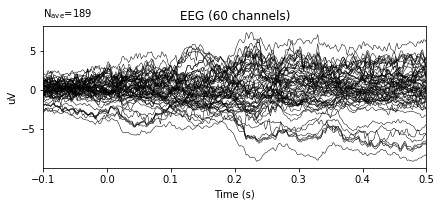

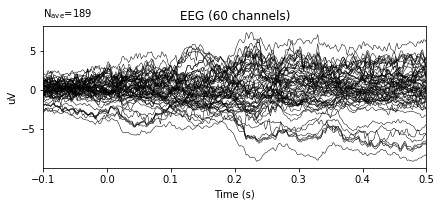

In [39]:
# ERP plot before re-referencing
epochs.average().plot()

For re-referencing, a function named set_eeg_reference() is provided by MNE package. It can be called by epochs, evoked or raw objects. It takes the new reference channel or 'average' as parameter. If an existing channel name is given, it uses that channel directly as the new reference. Otherwise, it calculates the average potential and uses it as the new reference. Note that this function modifies the original object. Therefore, if you want to keep the original object without any modification, use a deep copy of the original object.

In [43]:
import copy
# create two copies of original epochs object for further comparison
original_1 = copy.deepcopy(epochs)
original_2 = copy.deepcopy(epochs)

In [44]:
# Re-reference by averaging
re_ref_epochs = original_1.set_eeg_reference('average', projection=True)

Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.


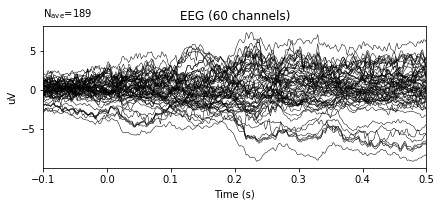

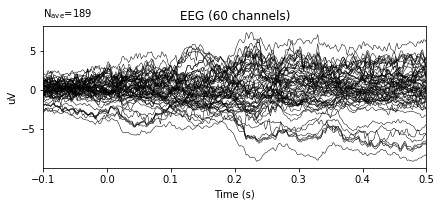

In [45]:
re_ref_epochs.average().plot()

After re-referencing by averaging the plots do not change at all. The reason for that when data is loaded, data is already has averaged reference. The documentation of the dataset includes the information related the reference.

If you want to use an existing channel as the new reference, pass channel name as parameter to set_eeg_reference function. You can find the list of channel names by calling epochs.ch_names

Applying a custom EEG reference.


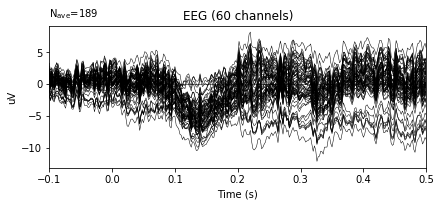

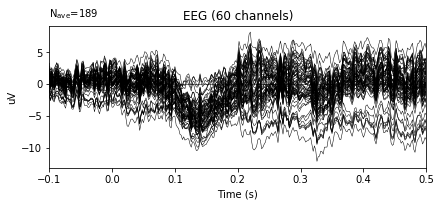

In [46]:
# Set a channel as the new reference
re_ref_epochs_2 = original_2.set_eeg_reference(['TP8'])
re_ref_epochs_2.average().plot()

When channel TP8 is used as reference electrode, the wave forms changed significantly.

The below plots show ERP values for standard events and target events. The difference between two plot is the choice of reference channel.

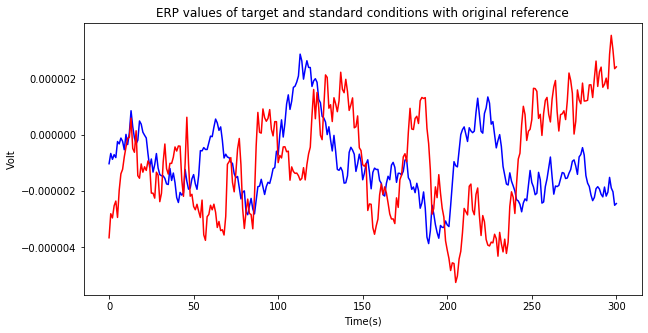

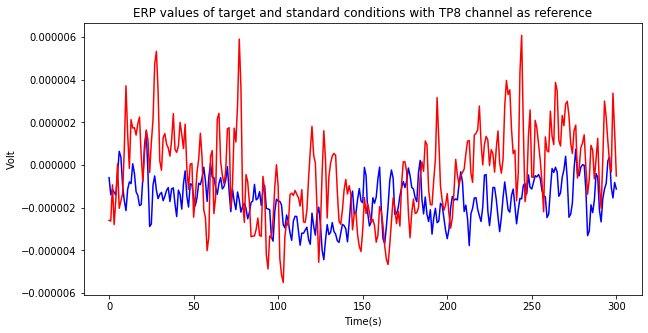

In [114]:
from matplotlib import pyplot as plt
%matplotlib inline

references = ['original', 'TP8']
st = epochs['Standard']
nv = epochs['Novel']

st_2 = original_2['Standard']
nv_2 = original_2['Novel']
ch = 18
for i in range(len(references)):

    fig, ax = plt.subplots(figsize=(10, 5))
    ax.set_xlabel('Time(s)')
    ax.set_ylabel('Volt')
    #plt.ylim(-0.00008, 0.00008) 
    if references[i] == 'original': 
        plt.title('ERP values of target and standard conditions with original reference')
        ax.plot(st.average().data[ch,:], color='blue')
        ax.plot(nv.average().data[ch,:], color='red')
    
    else:
        plt.title('ERP values of target and standard conditions with TP8 channel as reference')
        ax.plot(st_2.average().data[ch,:], color='blue')
        ax.plot(nv_2.average().data[ch,:], color='red')

    plt.show()


As you can see the above plots, differences in the responses are decreasing significantly when the reference changes. Most of the times, the aim of eeg analysis is to identify changes among different conditions. So, a wrong reference choice may lead a situation where those differences cannot be captured. Therefore, reference selection is one of the vital steps during eeg analysis.

##### Effects of Re-referencing on Topography
The following topographic graphs are produced by using the original epoched data.

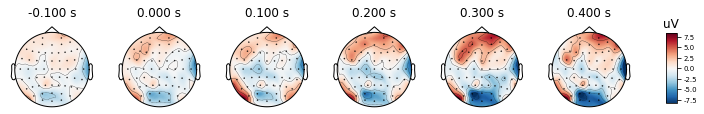

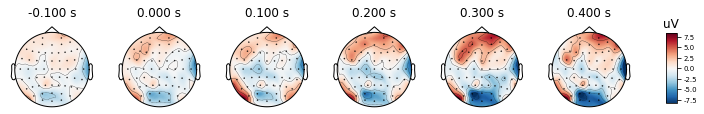

In [54]:
import numpy as np 
%matplotlib inline
times = np.arange(-0.1, 0.5, 0.1)
epochs.average().plot_topomap(times, ch_type='eeg')

After re-referencing with channel TP8, the values at channels are changing as you may see the color changes. However the relative differences between channels remain the same. Therefore we can conclude that change in reference channel does not affect the topography.

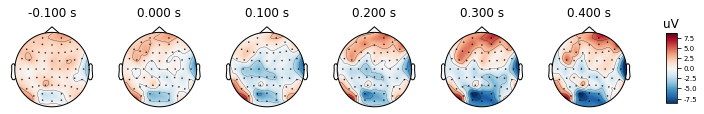

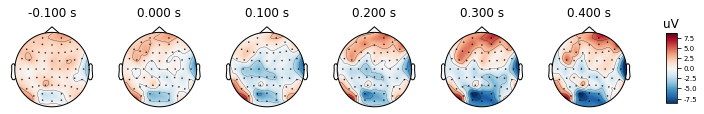

In [51]:
re_ref_epochs_2.average().plot_topomap(times, ch_type='eeg')